<a href="https://colab.research.google.com/github/AhzamAhmed6/CIFAR-using-CNN/blob/main/28PyTorch_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import torch.nn.functional as F

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

batch_size=128
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    shuffle=True,
    batch_size=batch_size
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [3]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [4]:
len(train_dataset.targets)

50000

In [39]:
k = len(set(train_dataset.targets))
k

10

In [43]:
class CNN(nn.Module):
  def __init__(self, k):
    super(CNN, self).__init__()
    self.cnn1 = nn.Conv2d(3, 6, 5)
    self.cnn2 = nn.Conv2d(6, 16, 5)
    self.maxpool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.maxpool(F.relu(self.cnn1(x)))
    x = self.maxpool(F.relu(self.cnn2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

In [44]:
model = CNN(k)

In [5]:
# model = nn.Sequential(
#     nn.Conv2d(3, 6, 5),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),    
#     nn.Conv2d(6, 16, 5),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Flatten(),
#     nn.Linear(16*5*5, 120),
#     nn.Linear(120, 84),
#     nn.Linear(84, 10)
# )

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
model.to(device)

CNN(
  (cnn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cnn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [47]:
epochs = 15
def traning(train_loader, epochs, criterion, optimizer, model):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    train_losses[i] = np.mean(train_loss)
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
    test_losses[i] = np.mean(test_loss)
  return train_losses, test_losses

In [21]:
train_losses, test_losses = traning(train_loader, epochs, criterion, optimizer, model)

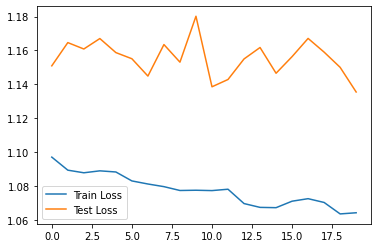

In [22]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

In [28]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
  
  return train_losses, test_losses

In [48]:
train_losses_1, test_losses_1 = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs)

Epoch 1/15, Train Loss: 1.9555, Test Loss: 1.7484
Epoch 2/15, Train Loss: 1.7081, Test Loss: 1.6608
Epoch 3/15, Train Loss: 1.6239, Test Loss: 1.6073
Epoch 4/15, Train Loss: 1.5625, Test Loss: 1.5469
Epoch 5/15, Train Loss: 1.5155, Test Loss: 1.5147
Epoch 6/15, Train Loss: 1.4874, Test Loss: 1.5178
Epoch 7/15, Train Loss: 1.4501, Test Loss: 1.4969
Epoch 8/15, Train Loss: 1.4283, Test Loss: 1.4518
Epoch 9/15, Train Loss: 1.3991, Test Loss: 1.4213
Epoch 10/15, Train Loss: 1.3762, Test Loss: 1.4432
Epoch 11/15, Train Loss: 1.3542, Test Loss: 1.4341
Epoch 12/15, Train Loss: 1.3373, Test Loss: 1.4090
Epoch 13/15, Train Loss: 1.3181, Test Loss: 1.4061
Epoch 14/15, Train Loss: 1.3030, Test Loss: 1.4050
Epoch 15/15, Train Loss: 1.2850, Test Loss: 1.3823


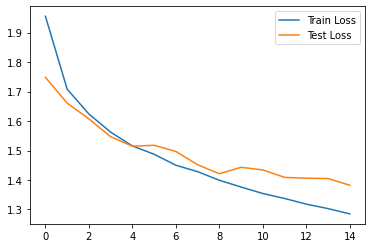

In [49]:
plt.plot(train_losses_1, label='Train Loss')
plt.plot(test_losses_1, label='Test Loss')
plt.legend();

In [33]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  
  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.6453, Test acc: 0.5983
